In [1]:
import pandas as pd
import numpy as np
import sys
import os

# Thêm đường dẫn thư mục gốc của dự án vào PYTHONPATH
project_path = '/Users/nhinguyen/Documents/KLTN/STOCK-MOVEMENT-PREDICTION-USING-MACHINE-LEARNING-BASED-ON-TECHNICAL-INDICATORS'
if project_path not in sys.path:
    sys.path.append(project_path)

from indicators.ta_indicators import calculate_indicators_for_group

stocks = pd.read_csv(os.path.join(project_path, 'data/bid_ohlc.csv'))

stocks['trading_date'] = pd.to_datetime(stocks['trading_date'], errors='coerce')

stocks = stocks[stocks['trading_date'] >= '2014-01-01']
stocks = stocks.sort_values(['trading_date'])

stock_data_with_indicators = stocks.groupby('ticker').apply(calculate_indicators_for_group).reset_index(drop=True)
stock_data_with_indicators['key'] = stock_data_with_indicators["ticker"] + stock_data_with_indicators["trading_date"].dt.strftime("%Y-%m-%d")
stock_data_with_indicators

,ticker,trading_date,open,high,low,close,volume,MACD,RSI,Compare Close MA(20),...,MA10,MA20,Close_vs_MA20,MA10_vs_MA20,Mean_t0_t5,Mean_t25_t30,Max_t0_t25,Pct_Diff,Y,key
0,BID,2014-03-03,8711.90,8763.45,8608.80,8608.80,954830.0,31.379789,44.444444,0.983220,...,8634.575,8755.7175,0,0,8651.758333,8651.758333,9691.35,-11.170270,-1,BID2014-03-03
1,BID,2014-03-04,8557.25,8608.80,8505.70,8557.25,1551740.0,28.218397,44.444444,0.983704,...,8634.575,8699.0125,0,0,8643.166667,8643.166667,9691.35,-11.702188,-1,BID2014-03-04
2,BID,2014-03-05,8608.80,8660.35,8557.25,8557.25,737090.0,26.874969,50.000000,0.988978,...,8634.575,8652.6175,0,0,8634.575000,8643.166667,9691.35,-11.702188,-1,BID2014-03-05
3,BID,2014-03-06,8557.25,8608.80,8505.70,8557.25,768340.0,26.680177,42.857143,0.991933,...,8619.110,8626.8425,0,0,8625.983333,8634.575000,9691.35,-11.702188,-1,BID2014-03-06
4,BID,2014-03-07,8557.25,8608.80,8557.25,8557.25,773450.0,27.154730,46.153846,0.991933,...,8613.955,8626.8425,0,0,8600.208333,8625.983333,9691.35,-11.702188,-1,BID2014-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,BID,2024-04-25,49750.00,50300.00,49300.00,49600.00,1054622.0,-212.199611,45.512821,0.974125,...,50195.000,50917.5000,0,0,49258.333333,47900.000000,54200.00,-8.487085,-1,BID2024-04-25
2538,BID,2024-04-26,49600.00,50100.00,49100.00,49200.00,776097.0,-197.412235,46.710526,0.969506,...,49815.000,50747.5000,0,0,49441.666667,47658.333333,54200.00,-9.225092,-1,BID2024-04-26
2539,BID,2024-05-02,49300.00,49700.00,48850.00,49200.00,569727.0,-173.658962,44.520548,0.972284,...,49395.000,50602.5000,0,0,49583.333333,47541.666667,54200.00,-9.225092,-1,BID2024-05-02
2540,BID,2024-05-03,49650.00,49900.00,49000.00,49200.00,701877.0,-145.135420,36.220472,0.975078,...,49345.000,50457.5000,0,0,49433.333333,47550.000000,53400.00,-7.865169,-1,BID2024-05-03


In [2]:
fundamental_metrics = pd.read_csv(os.path.join(project_path, 'data/bid_fa.csv'))
fundamental_metrics = fundamental_metrics[['ticker', 'trading_date', 'pb', 'pe', 'roe', 'roa']]
fundamental_metrics['trading_date'] = pd.to_datetime(fundamental_metrics['trading_date'], errors='coerce')
fundamental_metrics['key'] = fundamental_metrics["ticker"] + fundamental_metrics["trading_date"].dt.strftime("%Y-%m-%d")
ticker = ['BID']
fundamental_metrics = fundamental_metrics[fundamental_metrics['ticker'].isin(ticker)]
fundamental_metrics

,ticker,trading_date,pb,pe,roe,roa,key
0,BID,2012-11-02,0.000000,NaN,0.128767,0.007417,BID2012-11-02
1,BID,2012-11-05,0.000000,NaN,0.128767,0.007417,BID2012-11-05
2,BID,2012-11-06,0.000000,NaN,0.128767,0.007417,BID2012-11-06
3,BID,2012-11-07,0.000000,NaN,0.128767,0.007417,BID2012-11-07
4,BID,2012-11-08,0.000000,NaN,0.128767,0.007417,BID2012-11-08
...,...,...,...,...,...,...,...
2888,BID,2024-06-04,2.188911,12.392282,NaN,NaN,BID2024-06-04
2889,BID,2024-06-05,2.191210,12.405299,NaN,NaN,BID2024-06-05
2890,BID,2024-06-06,2.202707,12.470385,NaN,NaN,BID2024-06-06
2891,BID,2024-06-07,2.195809,12.431333,NaN,NaN,BID2024-06-07


In [3]:
import pandas as pd

data = pd.merge(stock_data_with_indicators, fundamental_metrics, how="left", on="key").sort_values(by='trading_date_x')
data.dropna(inplace=True)
data

,ticker_x,trading_date_x,open,high,low,close,volume,MACD,RSI,Compare Close MA(20),...,Max_t0_t25,Pct_Diff,Y,key,ticker_y,trading_date_y,pb,pe,roe,roa
0,BID,2014-03-03,8711.90,8763.45,8608.80,8608.80,954830.0,31.379789,44.444444,0.983220,...,9691.35,-11.170270,-1,BID2014-03-03,BID,2014-03-03,1.444305,0.000000,0.142028,0.008160
1,BID,2014-03-04,8557.25,8608.80,8505.70,8557.25,1551740.0,28.218397,44.444444,0.983704,...,9691.35,-11.702188,-1,BID2014-03-04,BID,2014-03-04,1.435657,0.000000,0.142028,0.008160
2,BID,2014-03-05,8608.80,8660.35,8557.25,8557.25,737090.0,26.874969,50.000000,0.988978,...,9691.35,-11.702188,-1,BID2014-03-05,BID,2014-03-05,1.435657,0.000000,0.142028,0.008160
3,BID,2014-03-06,8557.25,8608.80,8505.70,8557.25,768340.0,26.680177,42.857143,0.991933,...,9691.35,-11.702188,-1,BID2014-03-06,BID,2014-03-06,1.435657,0.000000,0.142028,0.008160
4,BID,2014-03-07,8557.25,8608.80,8557.25,8557.25,773450.0,27.154730,46.153846,0.991933,...,9691.35,-11.702188,-1,BID2014-03-07,BID,2014-03-07,1.435657,0.000000,0.142028,0.008160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,BID,2024-03-25,54200.00,55500.00,52700.00,53000.00,1264961.0,-96.935681,44.067797,1.003883,...,54400.00,-2.573529,0,BID2024-03-25,BID,2024-03-25,2.561438,14.018476,0.180520,0.009855
2517,BID,2024-03-26,53000.00,53900.00,53000.00,53000.00,1411023.0,-105.292692,44.067797,1.003883,...,54400.00,-2.573529,0,BID2024-03-26,BID,2024-03-26,2.561438,14.018476,0.180520,0.009855
2518,BID,2024-03-27,53300.00,53300.00,52500.00,52500.00,1609580.0,-145.087421,46.428571,0.995733,...,54400.00,-3.492647,0,BID2024-03-27,BID,2024-03-27,2.537273,13.886227,0.180520,0.009855
2519,BID,2024-03-28,53200.00,53900.00,52500.00,52600.00,1360986.0,-163.879316,58.241758,0.998008,...,54400.00,-3.308824,0,BID2024-03-28,BID,2024-03-28,2.542106,13.912676,0.180520,0.009855


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; tota

/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
111 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
88 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/base.py", line 638, in _validate_params
    valid

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Training Set Evaluation
Accuracy: 1.0
Confusion Matrix:
 [[ 867    0    0]
 [   0 1082    0]
 [   0    0   17]]
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       867
           0       1.00      1.00      1.00      1082
           1       1.00      1.00      1.00        17

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966

Test Set Evaluation
Accuracy: 0.8821138211382114
Confusion Matrix:
 [[205  21   0]
 [ 30 229   0]
 [  0   7   0]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.87      0.91      0.89       226
           0       0.89      0.88      0.89       259
           1       0.00      0

/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

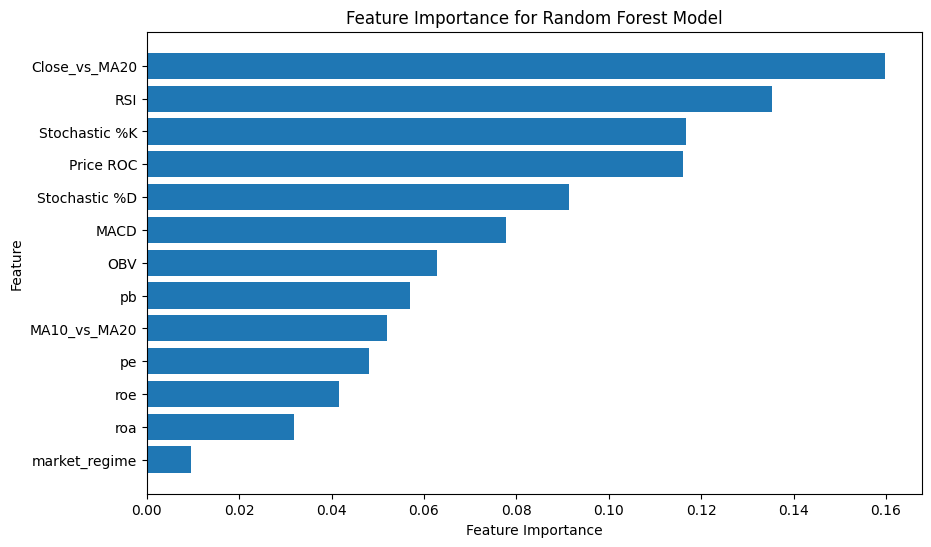

In [6]:
import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt

def random_forest(data:pd.DataFrame):
    X = data[['Stochastic %D', 'Stochastic %K', 'MACD', 'RSI', 'OBV', 'MA10_vs_MA20', 'Close_vs_MA20', 'Price ROC', 'market_regime', 'pb', 'pe', 'roe', 'roa']]
    y = data['Y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_distributions = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [6, 7, 8, 10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
    }

    rf_model = RandomForestClassifier(random_state=42)

    rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions,
                                n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

    rf_random.fit(X_train, y_train)

    print("Best Hyperparameters:", rf_random.best_params_)

    best_rf_model = rf_random.best_estimator_
    y_train_pred = best_rf_model.predict(X_train)
    y_test_pred = best_rf_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_class_report = classification_report(y_train, y_train_pred)

    # Đánh giá mô hình trên tập kiểm tra
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred)

    print("Training Set Evaluation")
    print("Accuracy:", train_accuracy)
    print("Confusion Matrix:\n", train_conf_matrix)
    print("Classification Report:\n", train_class_report)

    print("Test Set Evaluation")
    print("Accuracy:", test_accuracy)
    print("Confusion Matrix:\n", test_conf_matrix)
    print("Classification Report:\n", test_class_report)

    # Tính toán và hiển thị tầm quan trọng của các đặc trưng
    feature_importances = best_rf_model.feature_importances_
    features = X.columns
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Random Forest Model')
    plt.gca().invert_yaxis()
    plt.show()

    # Nếu muốn lưu mô hình để sử dụng sau này
    joblib.dump(best_rf_model, os.path.join(project_path, 'models/best_random_forest_model.pkl'))

rf_result = random_forest(data)
rf_result